# HD Integrated Visium Interactive Suite (HiVis) - demo notebook

This Notebook describes the usage of the HiVis tool for the analysis of VisiumHD experiment.



In [1]:
import os
import sys
sys.path.append(os.path.abspath(".."))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from HiVis import HiVis, HiVis_utils

import importlib

importlib.reload(HiVis_utils.HiVis_plot)
importlib.reload(HiVis.Aggregation_utils)

importlib.reload(HiVis_utils)
importlib.reload(HiVis)

ImportError: cannot import name 'Aggregation_utils' from partially initialized module 'HiVis' (most likely due to a circular import) (C:\Users\royno.WISMAIN\AppData\Local\anaconda3\envs\test\Lib\site-packages\HiVis\__init__.py)

# Import data
The data in this tutorial is of mouse small intestine, available from [10X datasets](https://www.10xgenomics.com/datasets/visium-hd-cytassist-gene-expression-libraries-of-mouse-intestine)

If you wish to follow along, download the following files:
* [Microscope image](https://cf.10xgenomics.com/samples/spatial-exp/3.0.0/Visium_HD_Mouse_Small_Intestine/Visium_HD_Mouse_Small_Intestine_tissue_image.btf) (1.6 GB)
* [Binned outputs](https://cf.10xgenomics.com/samples/spatial-exp/3.0.0/Visium_HD_Mouse_Small_Intestine/Visium_HD_Mouse_Small_Intestine_binned_outputs.tar.gz) (6 GB, but only square_002um are needed). Extract the .gz and .tar files.

When creating a HiVis object, you need to specify the path of the data and image, and the name of the sample. Additionaly you can add any sample metadata as a dict, which is usefull when working with multiple samples. 

During the first import, which can take few minutes, the image is cropped to the actual coordinates of the data. The cropped image is the one that should be used later, when working with QuPath.

Low-res image selected
[Loading images]
[Loading metadata]
[Loading data]
Low-res image selected
Low-res image selected
Low-res image selected
Low-res image selected
Low-res image selected


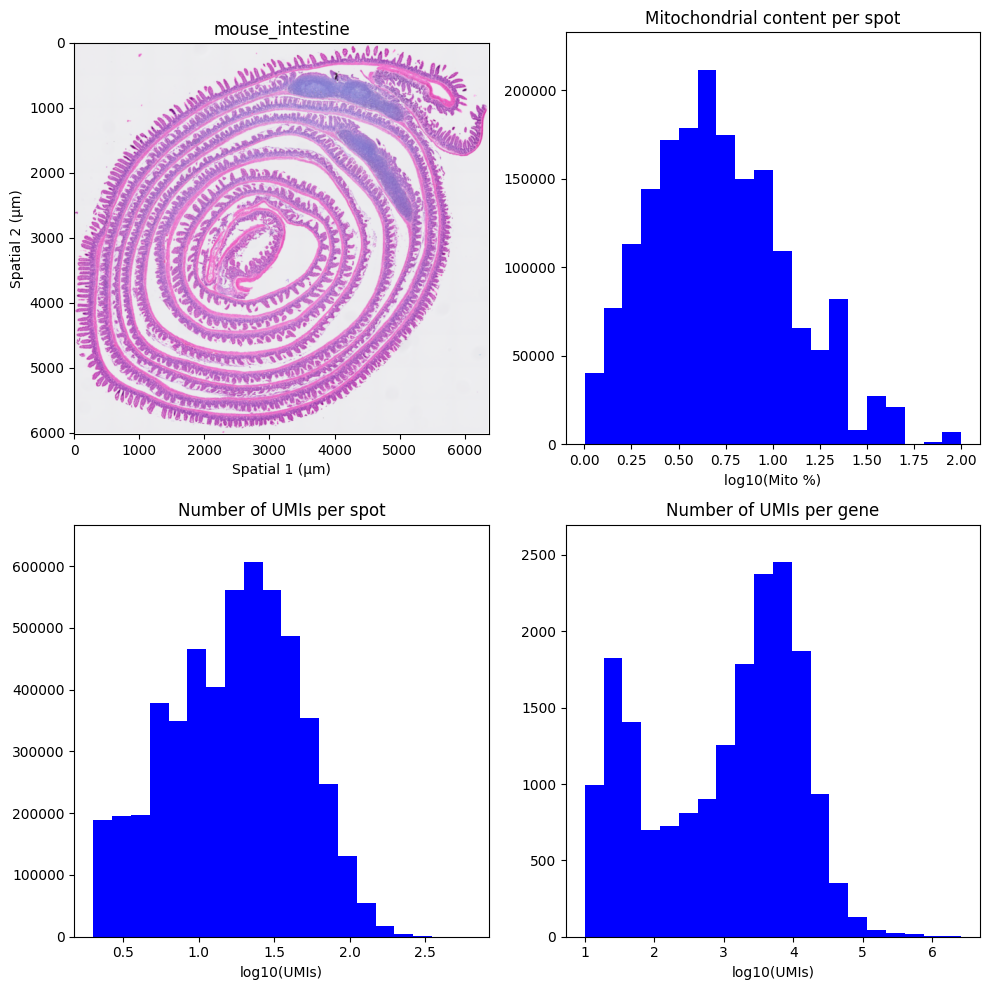

In [9]:
path_image_fullres = r"outs\Visium_HD_Mouse_Small_Intestine_tissue_image.btf"
path_input_data = r"outs\binned_outputs\square_002um"
path_output = r"output"
properties = {"organism":"mouse",
              "organ":"Small intestine",
              "cancer": False,
              "source":"10X"}
si.update()
si = HiVis.new(path_image_fullres, 
               path_input_data, 
               path_output,
               name="mouse_intestine",  
               properties=properties)

We now have a HiVis object, which stores the images, anndata and enables plotting and basic analysis

In [168]:
print(si)

# mouse_intestine #
	Organism: mouse
	Size: 5367189 x 18612

obs: in_tissue, array_row, array_col, pxl_row_in_fullres, pxl_col_in_fullres, pxl_col_in_lowres, pxl_row_in_lowres, pxl_col_in_highres, pxl_row_in_highres, um_x, um_y, nUMI, mito_sum, nUMI_log10, mito_percent_log10, muscle_villi_classifier, intestine_part, intestine_part_id

var: gene_ids, feature_types, genome, nUMI_gene, nUMI_gene_log10


*******************************************************

There are additional attributes we can access in HiVis.

In [172]:
print(si.adata)

AnnData object with n_obs × n_vars = 5367189 × 18612
    obs: 'in_tissue', 'array_row', 'array_col', 'pxl_row_in_fullres', 'pxl_col_in_fullres', 'pxl_col_in_lowres', 'pxl_row_in_lowres', 'pxl_col_in_highres', 'pxl_row_in_highres', 'um_x', 'um_y', 'nUMI', 'mito_sum', 'nUMI_log10', 'mito_percent_log10', 'muscle_villi_classifier', 'intestine_part', 'intestine_part_id'
    var: 'gene_ids', 'feature_types', 'genome', 'nUMI_gene', 'nUMI_gene_log10'
    uns: 'spatial'
    obsm: 'spatial'


In [171]:
print(si.name)
print(si.image_fullres.shape) # Also image_highres, image_lowres
print(si.shape) # spots * genes
print(si.path_output)
print(si.properties)

mouse_intestine
(21943, 23304, 3)
(5367189, 18612)
output
{'organism': 'mouse', 'organ': 'Small intestine', 'cancer': False, 'source': '10X'}


*****

Data can easily be acessed through the AnnData or directly

In [76]:
print("nUMI: " + str(si["nUMI"])) # obs
print("nUMI_gene: " + str(si["nUMI_gene_log10"])) # var
gene = "Apob"
print("Apob: " + str(si[gene])) # gene data

nUMI: [ 1. 13.  5. ... 16. 15. 29.]
nUMI_gene: [2.2227166 1.3222193 3.0195317 ... 4.1098824 5.3952827 3.8132472]
Apob: [0. 0. 0. ... 0. 0. 0.]


# Plotting 
Every plot returns matplotlib ax, which can be passed to other plot function and is fully customizible.

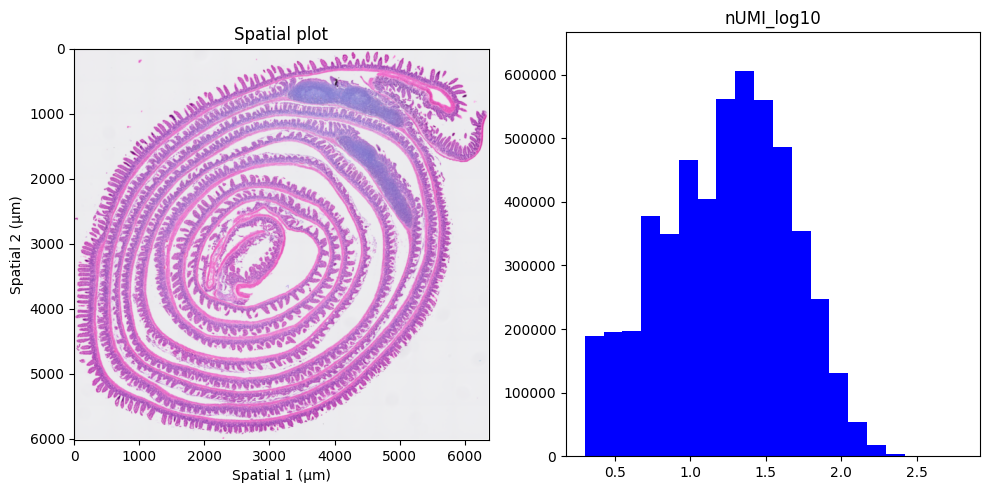

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
si.plot.spatial(ax=axes[0], title="Spatial plot")
si.plot.hist("nUMI_log10", ax=axes[1])
plt.tight_layout()

**** 

Plots have built-in customizations

<Figure size 640x480 with 0 Axes>

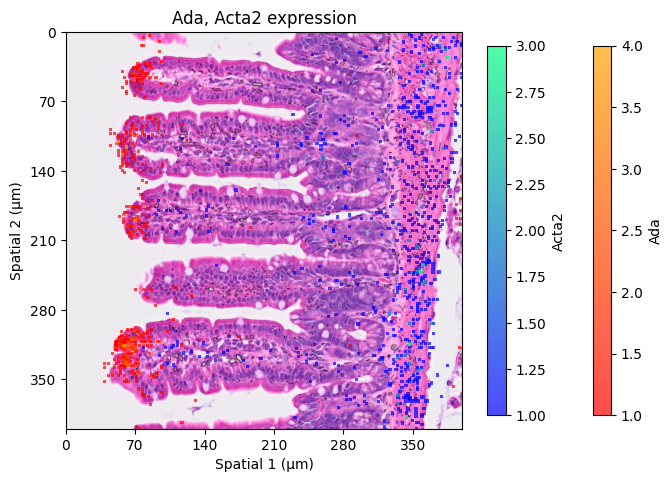

In [35]:
ax = si.plot.spatial("Ada", xlim=[0,400], ylim=[3300,3700], cmap=["red","orange"], alpha=0.7)
ax = si.plot.spatial("Acta2", xlim=[0,400], ylim=[3300,3700], cmap="winter", alpha=0.7, ax=ax, title="Ada, Acta2 expression");

# Work with pixel classifier

A classifier can also be a mask (image with the same dimension as the image that is stored in si.image_fullres).
Detailed instructions for creating a pixel classifier can be found in the readme.

[Importing mask]


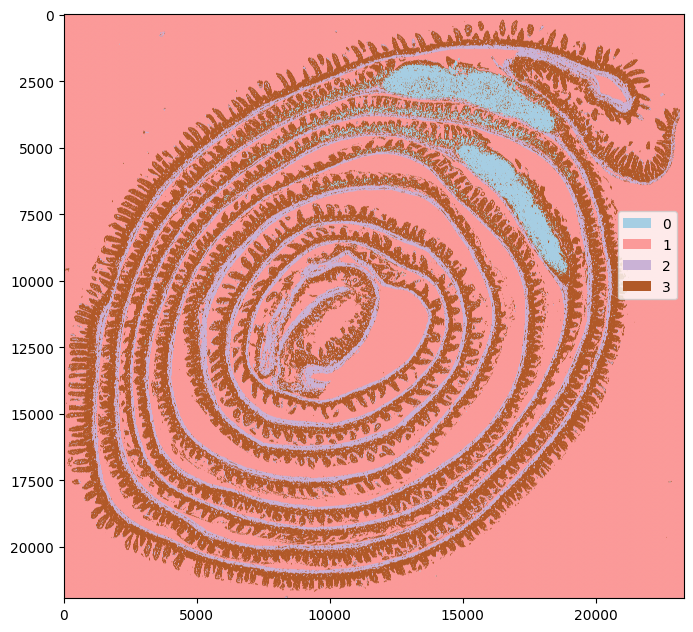

Assigning spots identity [muscle_villi_classifier]: 100%|█████████████████| 5367189/5367189 [01:38<00:00, 54668.08it/s]



To rename the values in the metadata, call the [update_meta] method with [muscle_villi_classifier] and dictionary with current_name:new_name


array([[1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [45]:
classifier_path = r"qupath\pixel_classifier.tif"
classifier_name = "muscle_villi_classifier"

mask_values = si.add_mask(classifier_path, classifier_name, plot=True)

****

We can now rename the values

In [46]:
values = {0:"immune", 1:"lumen", 2:"muscle", 3:"tissue"}
si.update_meta(classifier_name, values)

And visualize the results

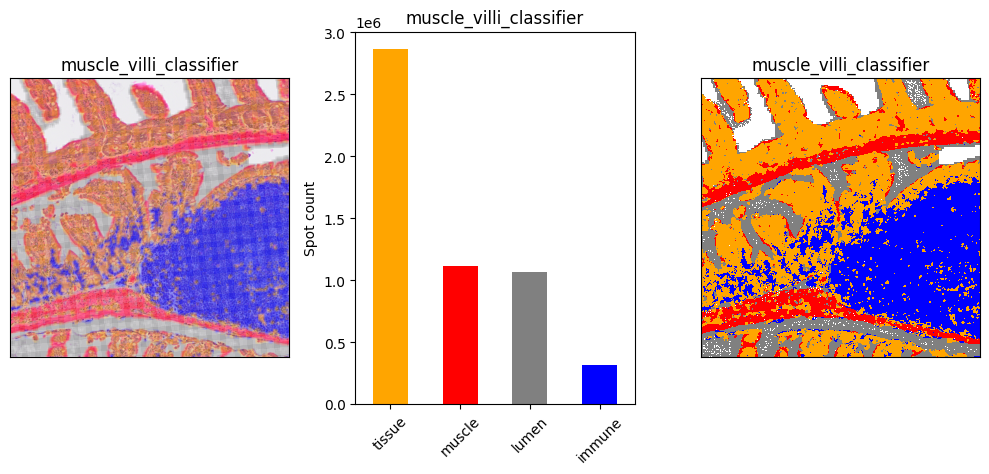

In [124]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
colors = {"immune":"blue", "lumen":"gray", "muscle":"red", "tissue":"orange"}
si.plot.spatial(classifier_name, xlim=[3000,3600], ylim=[300,900], ax=axes[0], cmap=colors, legend=False, alpha=0.05, axis_labels=False)
si.plot.hist(classifier_name, ax=axes[1], cmap=colors, ylab="Spot count")
plt.tight_layout()

# Work with annotations
Annotations can be directly exported from Qupath as geojson

In [60]:
annotation_path = r"qupath\annotation.geojson"
annotation_name = "intestine_part"

mask_values = si.add_annotations(annotation_path, annotation_name)

No measurements found


<Axes: title={'center': 'intestine_part'}, xlabel='Spatial 1 (µm)', ylabel='Spatial 2 (µm)'>

<Figure size 640x480 with 0 Axes>

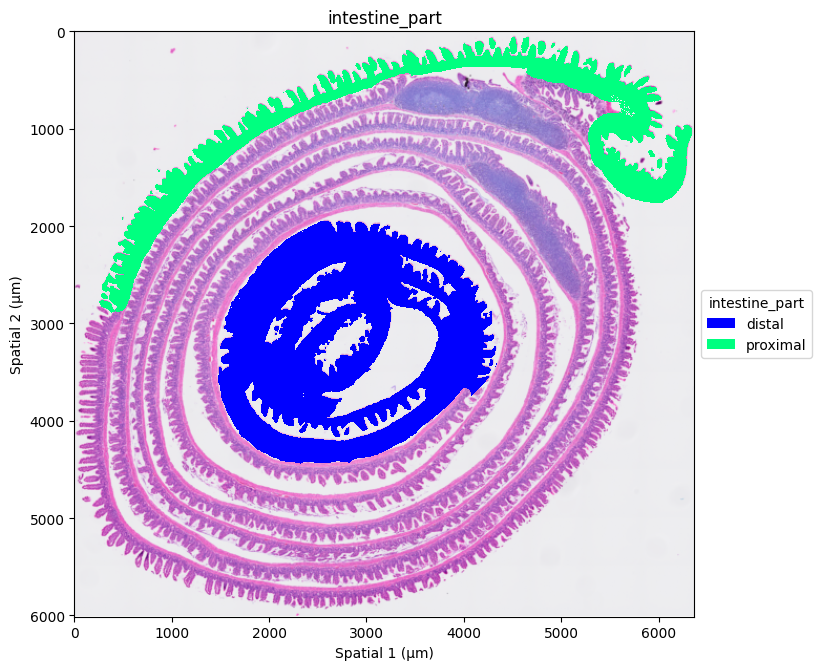

In [61]:
si.plot.spatial(annotation_name)

# Subsetting the HiViz object
We can subset our object based on obs and/or var.

In this example we will subset only genes that are relatively highly expressed.

The subsetting will create a new HiVis object.

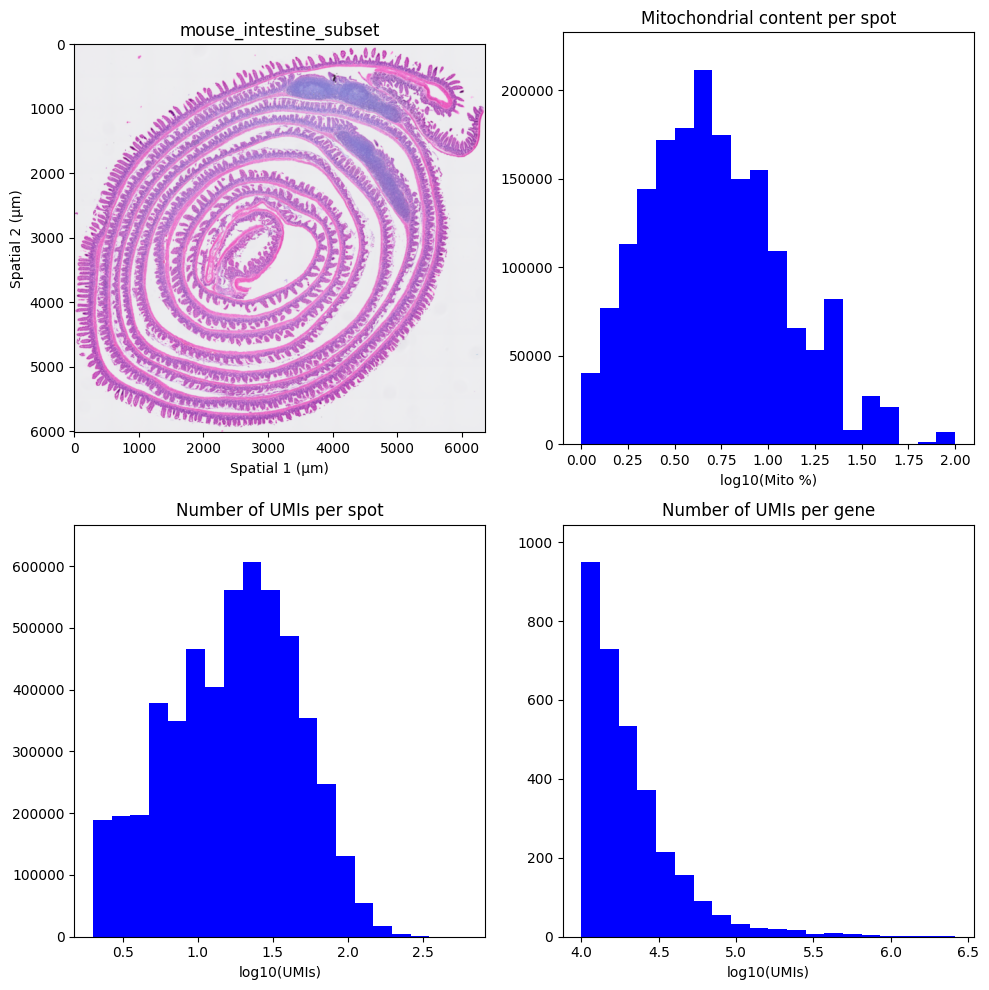

In [88]:
high_expressed = si["nUMI_gene"] > 10000
si_subset = si[:, high_expressed]
si_subset.rename("highly_expressed_genes") # otherwise it will be called "subset"

# Compare groups 
Comparison can be performed on classifiers, annotations, and any categorical column in the observations.
## Pseudo-bulk
If we are just interested in the expression levels of each group, we can simply perform pseudobulk.

In [ ]:
si_subset.pseudobulk(annotation_name)

## Differential gene expression
If we are interested in actual statistical test we can perform a DGE analysis.

In our example the annotations are large, so the analysis takes few minutes.

In [89]:
proximal_distal = si_subset.dge(annotation_name, group1="proximal", group2="distal")
proximal_distal.head()

Normalizing "proximal" spots
Normalizing "distal" spots
Number of entries in group1: (498808, 3222), in group2: (1000037, 3222)


Running wilcox on [intestine_part]: 100%|██████████████████████████████████████████| 3222/3222 [11:43<00:00,  4.58it/s]


log2fc  proximal    distal  pval_proximal   pval_distal  \
Lypla1   0.332722  0.000201  0.000157   1.000000e+00  2.912348e-19   
Tcea1   -0.106589  0.000131  0.000142   9.408197e-04  9.990592e-01   
Atp6v1h -0.173911  0.000137  0.000157   6.050715e-14  1.000000e+00   
Cops5    0.059409  0.000114  0.000109   5.822384e-03  9.941776e-01   
Arfgef1 -0.160877  0.000259  0.000290   4.662937e-15  1.000000e+00   

                 pval          qval  expression_mean  expression_min  \
Lypla1   2.912348e-19  1.039157e-18         0.000179        0.000157   
Tcea1    9.408197e-04  1.399502e-03         0.000136        0.000131   
Atp6v1h  6.050715e-14  1.847906e-13         0.000147        0.000137   
Cops5    5.822384e-03  7.979465e-03         0.000112        0.000109   
Arfgef1  4.662937e-15  1.512989e-14         0.000274        0.000259   

         expression_max     gene  
Lypla1         0.000201   Lypla1  
Tcea1          0.000142    Tcea1  
Atp6v1h        0.000157  Atp6v1h  
Cops5          0.000114    Cops5  
Arfgef1        0.000290  Arfgef1

We can explore the results

In [120]:
proximal_distal.loc[(proximal_distal["qval"] == 0) & (abs(proximal_distal["log2fc"]) > 4)]

log2fc  proximal    distal  pval_proximal  pval_distal  pval  qval  \
Lct    5.667436  0.000930  0.000006            1.0          0.0   0.0   0.0   
Saa1  -4.546364  0.000015  0.000620            0.0          1.0   0.0   0.0   
Apoa4  4.460378  0.002453  0.000100            1.0          0.0   0.0   0.0   
Enpp7  4.694431  0.001064  0.000029            1.0          0.0   0.0   0.0   

       expression_mean  expression_min  expression_max   gene  
Lct           0.000468        0.000006        0.000930    Lct  
Saa1          0.000318        0.000015        0.000620   Saa1  
Apoa4         0.001276        0.000100        0.002453  Apoa4  
Enpp7         0.000547        0.000029        0.001064  Enpp7

<Figure size 640x480 with 0 Axes>

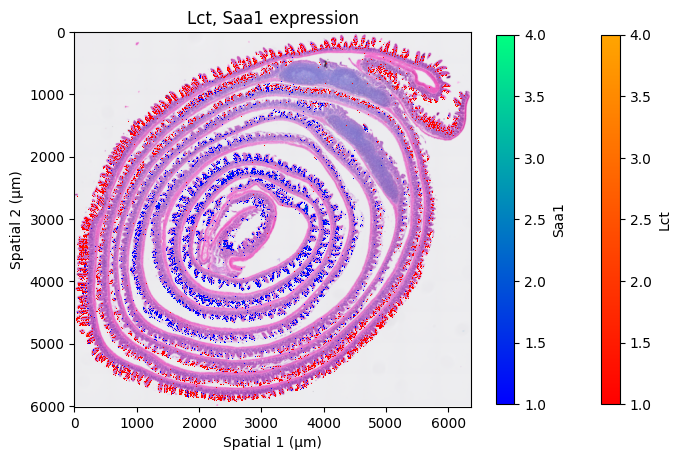

In [121]:
ax = si_subset.plot.spatial("Lct", cmap=["red","orange"])
ax = si_subset.plot.spatial("Saa1", cmap="winter", ax=ax, title="Lct, Saa1 expression")

# Work with single-cells and other structures
## Single cells
We can aggregate the spots into single-cells or single-nuclei.

In this example, the segmentation is performed in Qupath via Stardist with expansion of nuclei.

Tutorial for the segmentation can be seen in the readme file.



In [137]:
segmentation_path = "qupath/stardist_results.csv"
segmentation = pd.read_csv(segmentation_path, sep="\t")
segmentation.rename(columns={"InCell":"in_cell", "InNuc":'in_nucleus',"Object ID":"Cell_ID"}, inplace=True)

C:\Users\royno.WISMAIN\AppData\Local\Temp\ipykernel_32152\1901612745.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  segmentation = pd.read_csv(segmentation_path, sep="\t")


The aggregation by single cells is much faster then performing a pseudobulk on object.
In this case, the aggregation takes few minutes.
Notice that we can add measurements from qupath (color intensity, diameter of cells etc.) to to HiVis adata, and also aggregate metadata from the HiVis.
In this example, we will transfer the mito_sum to the

In [157]:
si_subset.add_agg_stardist(segmentation, name="SC", additional_obs=["Area µm^2","Length µm"])

[Splitting name column and merging metadata]
[Column 'in_nucleus' already exists. Overwriting...]
[Column 'in_cell' already exists. Overwriting...]
[Column 'Cell_ID' already exists. Overwriting...]
[Column 'Area µm^2' already exists. Overwriting...]
[Column 'Length µm' already exists. Overwriting...]
[Splitting data to nuc/cyto]


Aggregating spots expression: 100%|███████████████████████████████████████████| 251134/251134 [07:11<00:00, 582.02it/s]


[Converting to sparse matrices]


TypeError: all inputs must be Index

In [156]:
si_subset.update()

In [153]:
si_subset.adata

AnnData object with n_obs × n_vars = 5367189 × 3222
    obs: 'in_tissue', 'array_row', 'array_col', 'pxl_row_in_fullres', 'pxl_col_in_fullres', 'nUMI', 'mito_sum', 'nUMI_log10', 'mito_percent_log10', 'muscle_villi_classifier', 'intestine_part', 'intestine_part_id', 'pxl_col_in_lowres', 'pxl_row_in_lowres', 'pxl_col_in_highres', 'pxl_row_in_highres', 'um_x', 'um_y', 'in_nucleus', 'in_cell', 'Cell_ID', 'Area µm^2', 'Length µm'
    var: 'gene_ids', 'feature_types', 'genome', 'nUMI_gene', 'nUMI_gene_log10'
    uns: 'spatial'
    obsm: 'spatial'

In [155]:
self = si_subset; self.columns[~self.columns.isin(["Cell_ID","in_cell","in_nucleus"])]

Index(['in_tissue', 'array_row', 'array_col', 'pxl_row_in_fullres',
       'pxl_col_in_fullres', 'nUMI', 'mito_sum', 'nUMI_log10',
       'mito_percent_log10', 'muscle_villi_classifier', 'intestine_part',
       'intestine_part_id', 'pxl_col_in_lowres', 'pxl_row_in_lowres',
       'pxl_col_in_highres', 'pxl_row_in_highres', 'um_x', 'um_y', 'Area µm^2',
       'Length µm'],
      dtype='object')

# mouse_intestine_subset #
	Organism: mouse
	Size: 5367189 x 3222

obs: in_tissue, array_row, array_col, pxl_row_in_fullres, pxl_col_in_fullres, nUMI, mito_sum, nUMI_log10, mito_percent_log10, muscle_villi_classifier, intestine_part, intestine_part_id, pxl_col_in_lowres, pxl_row_in_lowres, pxl_col_in_highres, pxl_row_in_highres, um_x, um_y, in_nucleus, in_cell, Cell_ID, Area µm^2, Length µm

var: gene_ids, feature_types, genome, nUMI_gene, nUMI_gene_log10

In [158]:
si_subset.save()

SAVING [mouse_intestine_subset]


'output/mouse_intestine_subset.pkl'

In [166]:
si_subset["mito_sum"]

array([0., 0., 0., ..., 0., 0., 5.], dtype=float32)

In [164]:
si_subset = HiVis.load('output/mouse_intestine_subset.pkl')